In [1]:
from tensorflow.keras.models import Model, Sequential, load_model

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout, Subtract, Activation, GaussianNoise, Convolution1D, GlobalMaxPooling1D, Flatten, \
    TimeDistributed, Bidirectional
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint
from time import time

from attentionWithContext import AttentionWithContext
import pydot
import graphviz

import argparse

import pandas as pd
import datetime
import os

import matplotlib.pyplot as plt
import numpy as np
import keras.backend as K



In [2]:
def get_RNN(unit=LSTM, cells=64, bi=False, return_sequences=True, dropout_U=0., consume_less='cpu', l2_reg=0):
    rnn = unit(cells, return_sequences=return_sequences, consume_less=consume_less, dropout_U=dropout_U,
               W_regularizer=l2(l2_reg))
    if bi:
        rnn = Bidirectional(rnn)
    return rnn

def humor_RNN(**params):
    rnn_size = params.get("rnn_size", 32)
    rnn_drop_U = params.get("rnn_drop_U", 0.2)
    noise_words = params.get("noise_words", 0.3)
    drop_words = params.get("drop_words", 0.3)
    drop_sent = params.get("drop_sent", 0.3)
    sent_dense = params.get("sent_dense", 25)
    final_size = params.get("final_size", 1)
    drop_final = params.get("drop_final", 0.3)
    activity_l2 = params.get("activity_l2", 0.0001)


    use_attention = True
    use_sent_dense = False
  
    n_features = 4
    n_timesteps = 41


    encoder = Bidirectional(LSTM(rnn_size, return_sequences=use_attention))
    attention = AttentionWithContext()
    final_dense = Dense(final_size)

    def siamese_enc_att(emb):
        enc = encoder(emb)
        if use_attention:
            enc = attention(enc)
            enc = final_dense(enc)
        if use_sent_dense:
            enc = final_dense(enc)
            enc = Dropout(drop_sent)(enc)
        return enc

    input_a = Input(shape=(n_timesteps, n_features), dtype='float32')
    enc_a = siamese_enc_att(input_a)

    input_b = Input(shape=(n_timesteps, n_features), dtype='float32')
    enc_b = siamese_enc_att(input_b)

    diff = Subtract()([enc_a, enc_b])
    prob = Activation("sigmoid")(diff)
    model = Model([input_a, input_b], [prob])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
    model.summary()
    return model

In [6]:

args = {
    "hidden": 128,
    "epoch": 50,
    "model": "e50_h128",
    "plot": "loses_e50_h128",
    "pred": "prede50_h128",
    "sur": "Needle_Passing",
    "inputfolder": "/Users/burcinbo/Documents/ActionData/MatCodes/",
    "foldcount": 4,
    "cfold": 1
}

print(args)

surgeryType = args["sur"]
foldcount = int(args["foldcount"])
current_fold = int(args["cfold"])

n_hidden = int(args["hidden"])
n_epoch = int(args["epoch"])
batch_size = 2
n_timesteps = 41
n_features = 4

{'hidden': 128, 'epoch': 50, 'model': 'e50_h128', 'plot': 'loses_e50_h128', 'pred': 'prede50_h128', 'sur': 'Needle_Passing', 'inputfolder': '/Users/burcinbo/Documents/ActionData/MatCodes/', 'foldcount': 4, 'cfold': 1}


In [7]:
inputfolder = '/Users/burcinbo/Documents/ActionData/MatCodes/MatOutputs/TR95_dd_v3/folds/1/'
surgeryType = 'AttentionBased'
foldcount = 1
py_output_folder = './CleanedAttention/' + surgeryType + '/folds/' + str(foldcount)

n_hidden = 64
n_epoch = 10
batch_size = 2
current_fold = 1

True
train finished
test finished
val finished
X_train_l shape (128593, 164) X_train_r shape (128593, 164)
X_validation_l shape (54722, 164) X_validation_r shape (54722, 164)
Y_train shape (128593, 1) Y_validation shape (54722, 1)
reshaped matrices
X_train_l shape (128593, 41, 4) X_train_r shape (128593, 41, 4)
X_validation_l shape (54722, 41, 4) X_validation_r shape (54722, 41, 4)
Building NN Model...


/Users/burcinbo/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 41, 4)]              0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 41, 4)]              0         []                            
                                                                                                  
 bidirectional (Bidirection  (None, 41, 64)               9472      ['input_1[0][0]',             
 al)                                                                 'input_2[0][0]']             
                                                                                                  
 attention_with_context (At  (None, 64)                   4224      ['bidirectional[0][0]',   

/Users/burcinbo/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


64297/64297 [==============================] - 254s 4ms/step - loss: 0.1843 - accuracy: 0.9200 - val_loss: 0.1543 - val_accuracy: 0.9312
Epoch 3/10
64297/64297 [==============================] - 257s 4ms/step - loss: 0.1277 - accuracy: 0.9457 - val_loss: 0.1063 - val_accuracy: 0.9545
Epoch 4/10
64297/64297 [==============================] - 256s 4ms/step - loss: 0.1086 - accuracy: 0.9533 - val_loss: 0.1037 - val_accuracy: 0.9554
Epoch 5/10
64297/64297 [==============================] - 274s 4ms/step - loss: 0.0966 - accuracy: 0.9594 - val_loss: 0.1003 - val_accuracy: 0.9569
Epoch 6/10
64297/64297 [==============================] - 259s 4ms/step - loss: 0.0875 - accuracy: 0.9628 - val_loss: 0.0832 - val_accuracy: 0.9643
Epoch 7/10
64297/64297 [==============================] - 266s 4ms/step - loss: 0.0819 - accuracy: 0.9654 - val_loss: 0.0810 - val_accuracy: 0.9646
Epoch 8/10
64297/64297 [==============================] - 264s 4ms/step - loss: 0.0774 - accuracy: 0.9677 - val_loss: 0.077

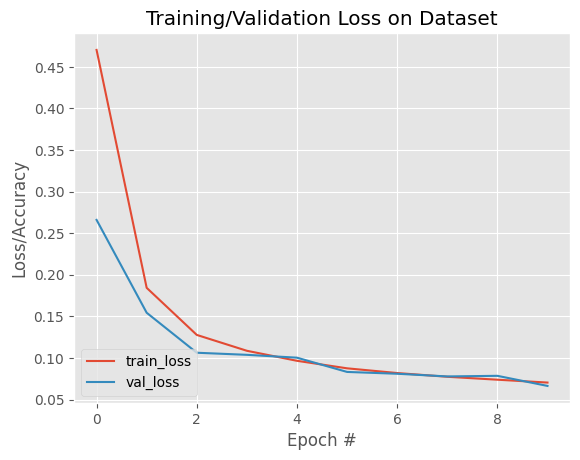

In [8]:
print(os.path.isdir(py_output_folder))
if not os.path.isdir(py_output_folder):
    os.makedirs(py_output_folder)

if not os.path.isdir(py_output_folder + '/models/'):
    os.makedirs(py_output_folder + '/models/')

if not os.path.isdir(py_output_folder + '/csvs/'):
    os.makedirs(py_output_folder + '/csvs/')

if not os.path.isdir(py_output_folder + '/figs/'):
    os.makedirs(py_output_folder + '/figs/')

for x in range(current_fold, current_fold+1):
    TRAIN_L_csv = inputfolder + str(x) + '_train_l.csv'
    TRAIN_R_csv = inputfolder + str(x) + '_train_r.csv'
    SCORES_T_csv = inputfolder + str(x) + '_train_s.csv'

    TEST_L_csv = inputfolder + str(x) + '_test_l.csv'
    TEST_R_csv = inputfolder + str(x) + '_test_r.csv'
    SCORES_TEST_csv = inputfolder + str(x) + '_test_s.csv'

    VAL_L_csv = inputfolder + str(x) + '_val_l.csv'
    VAL_R_csv = inputfolder + str(x) + '_val_r.csv'
    SCORES_V_csv = inputfolder + str(x) + '_val_s.csv'

    X_train_l = pd.read_csv(TRAIN_L_csv)
    X_train_r = pd.read_csv(TRAIN_R_csv)
    Y_train = pd.read_csv(SCORES_T_csv)
    print("train finished")

    X_test_l = pd.read_csv(TEST_L_csv)
    X_test_r = pd.read_csv(TEST_R_csv)
    Y_test = pd.read_csv(SCORES_TEST_csv)
    print("test finished")

    X_validation_l = pd.read_csv(VAL_L_csv)
    X_validation_r = pd.read_csv(VAL_R_csv)
    Y_validation = pd.read_csv(SCORES_V_csv)
    print("val finished")

    X_train_l = X_train_l.values
    X_train_r = X_train_r.values
    Y_train = Y_train.values

    X_test_l = X_test_l.values
    X_test_r = X_test_r.values
    Y_test = Y_test.values

    X_validation_l = X_validation_l.values
    X_validation_r = X_validation_r.values
    Y_validation = Y_validation.values

    print("X_train_l shape", X_train_l.shape, "X_train_r shape", X_train_r.shape)
    print("X_validation_l shape", X_validation_l.shape, "X_validation_r shape", X_validation_r.shape)
    print("Y_train shape", Y_train.shape, "Y_validation shape", Y_validation.shape)

    X_train_l = X_train_l.reshape((X_train_l.shape[0], n_timesteps, n_features))
    X_train_r = X_train_r.reshape((X_train_r.shape[0], n_timesteps, n_features))

    X_test_l = X_test_l.reshape((X_test_l.shape[0], n_timesteps, n_features))
    X_test_r = X_test_r.reshape((X_test_r.shape[0], n_timesteps, n_features))

    X_validation_l = X_validation_l.reshape((X_validation_l.shape[0], n_timesteps, n_features))
    X_validation_r = X_validation_r.reshape((X_validation_r.shape[0], n_timesteps, n_features))

    print("reshaped matrices")
    print("X_train_l shape", X_train_l.shape, "X_train_r shape", X_train_r.shape)
    print("X_validation_l shape", X_validation_l.shape, "X_validation_r shape", X_validation_r.shape)


    print("Building NN Model...")
    model = humor_RNN()
    plot_model(model, show_shapes=True, dpi=90, to_file=py_output_folder + '/figs/model.png')
    print(model.summary())

    training_start_time = time()
    fp = py_output_folder + '/models/' + str(x) + '_' + 'e30_h64' + '.hdf5'    

    checkpoint = ModelCheckpoint(fp, monitor='val_loss', save_best_only=True, mode='min')
    callbacks_list = [checkpoint]

    model_trained = model.fit([X_train_l, X_train_r], Y_train, batch_size=batch_size, epochs=n_epoch,
                              callbacks=callbacks_list,
                              validation_data=([X_validation_l, X_validation_r], Y_validation))

    print("Training time finished.\n{} epochs in {}".format(n_epoch,
                                                            datetime.timedelta(seconds=time() - training_start_time)))

    model.load_weights(fp)
    predicted = model.predict([X_test_l, X_test_r])
    print("predicted: ", predicted, "actual: ", Y_test)
    rmse = np.sqrt(((predicted - Y_test) ** 2).mean(axis=0))
    print("Results: %.2f (%.2f) MSE", rmse)


    allv = predicted.copy()
    for t in range(len(allv)):
        if allv[t] < 0.49:
            allv[t] = 0
        elif allv[t] > 0.51:
            allv[t] = 1
        else:
            allv[t] = 0.5


    prediction_results = np.concatenate((predicted, Y_test, allv, allv, allv, allv), axis=1)
    for p in range(len(prediction_results)):
        if (prediction_results[p, 1] == prediction_results[p, 2]):
            prediction_results[p, 3] = 1
        else:
            prediction_results[p, 3] = 0
    aa = np.sum(prediction_results, axis=0)
    prediction_results[:, 4] = aa[3] / len(prediction_results)
    prediction_results[:, 5] = rmse
    
    sp = py_output_folder + '/csvs/' + str(x) + 'pred_e30_h64' + '.csv'
    pd.DataFrame(prediction_results).to_csv(sp)

    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, n_epoch), model_trained.history["loss"], label="train_loss")
    plt.plot(np.arange(0, n_epoch), model_trained.history["val_loss"], label="val_loss")
    plt.title("Training/Validation Loss on Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    plt.savefig(py_output_folder + '/figs/' + str(x) + 'loses_e30_h64' + '.png')
    

    print("End of fold:" + str(x))
    del X_train_l, X_train_r, Y_train, X_test_l, X_test_r, Y_test, X_validation_l, X_validation_r, Y_validation
    K.clear_session()